In [200]:
import numpy as np
import random
import math
from collections import deque

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [201]:
m = 5 # number of locations, ranges from 1 ..... m
t = 24 # number of hours, ranges from 0 .... t-1
d = 30 # number of days, ranges from 0 ... d-1
episode_length = 10000
fixed_act_Set = 15
epsilon = 0.99
learning_rate = 0.01
batch_size = 32
gamma = 0.95
epsilon_min = 0
epsilon_decay = 0.9995
#Time to travel from location a to b given bt Time_matrix[a-1, b-1]
Time_matrix = np.random.randint(1, 11,(m, m))
#action is a tuple i,j . 0,0 represents the no ride action
actions = []
for i in range(m):
    for j in range(m):
        if i!=j or i==0:
            actions.append([i,j])
#state is a tuple of location, time, day
states = []
for i in range(m):
    for j in range(t):
        for k in range(d):
            states.append([i,j,k])

In [202]:
#function for encoding the representation of a state
#a state is represented as a vector os size m+t+d, where 1 of first m bits is on for denoting the location and so on
def state_trans(state,m,t,d):
    #print(state)
    state_encod = np.zeros(m+t+d)
    state_encod[np.int(state[0])] = 1
    state_encod[np.int(m+state[1])] = 1
    state_encod[np.int(m+t+state[2])] = 1
    #state_encod = state_encod.reshape(1,m+t+d)
    return state_encod   

In [203]:
#select an epsilon-greedy action accoording to q-values
def act(Q_value,epsilon,actions):
    #print(Q_value)
    #print(actions)
    if np.random.rand() <= epsilon:
        index = np.random.randint(0, len(actions),(1, 1))
        if actions[np.int(index)][0] == actions[np.int(index)][1] and actions[np.int(index)][1] != 0:
            return act(Q_value,epsilon,actions)
        else:
            return index
    else:
        index = np.argmax(Q_value)
        if actions[np.int(index)][0] == actions[np.int(index)][1] and actions[np.int(index)][1] != 0:
            return act(Q_value,epsilon,actions)
        else:
            return index

In [204]:
#reward_func for taking action a in state s
def reward_func(state, action, time_matrix):
    start_loc, time, day = state
    pickup, drop = action
    if pickup == 0 and drop == 0:
        return -1
    else:
        return time_matrix[pickup, drop] - time_matrix[start_loc, pickup]

In [205]:
#return the next state, given the current state and action
def next_state_func(state, action, time_matrix, t, d):
    start_loc, time, day = state
    pickup, drop = action
    if pickup == 0 and drop == 0:
        time_elapsed = 1
        drop = start_loc
    else:
        time_elapsed = time_matrix[start_loc, pickup] + time_matrix[pickup, drop]
    time_next = (time + time_elapsed) % t
    day_next = (day + (time + time_elapsed)//t) % d
    return drop, time_next, day_next

In [206]:
#use deep learning model to predict the Q-values for state and set of actions
def prediction_DQN(m,t,d,actions,X):
    X_test = X.reshape(1, m+t+d)
    prediction = model.predict(X_test)
    prediction = prediction[0,actions]
    prediction = prediction.reshape(len(actions))
    return prediction

In [207]:
# Deep learning model
model = Sequential()
model.add(Dense(400, input_dim = np.int(m+t+d),activation ='relu'))
model.add(Dense(200,activation ='relu'))
model.add(Dense((m-1)*m + 1,activation ='linear'))
model.compile(loss='mse',optimizer=Adam(lr=learning_rate))

Reward:6,Episode:0, Epsilon:0.99
Epoch 1/1
32/32 [==============================] - 0s 114us/step - loss: 28.8730
Reward:-5,Episode:50, Epsilon:0.9806372028257192
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 238040.8125
Reward:-3,Episode:100, Epsilon:0.9564192043876577
Epoch 1/1
32/32 [==============================] - 0s 75us/step - loss: 183568.9531
Reward:-3,Episode:150, Epsilon:0.9327992981356316
Epoch 1/1
32/32 [==============================] - 0s 98us/step - loss: 82947.5156
Reward:0,Episode:200, Epsilon:0.909762713473966
Epoch 1/1
32/32 [==============================] - 0s 125us/step - loss: 11431.2891
Reward:1,Episode:250, Epsilon:0.8872950445843583
Epoch 1/1
32/32 [==============================] - 0s 91us/step - loss: 3401.8306
Reward:-2,Episode:300, Epsilon:0.8653822414172703
Epoch 1/1
32/32 [==============================] - 0s 87us/step - loss: 1689.4602
Reward:-2,Episode:350, Epsilon:0.8440106009057953
Epoch 1/1
32/32 [=======================

Reward:3,Episode:3150, Epsilon:0.20805759452384043
Epoch 1/1
32/32 [==============================] - 0s 117us/step - loss: 0.5670
Reward:7,Episode:3200, Epsilon:0.2029193655389661
Epoch 1/1
32/32 [==============================] - 0s 91us/step - loss: 0.5949
Reward:-5,Episode:3250, Epsilon:0.19790803121112852
Epoch 1/1
32/32 [==============================] - 0s 78us/step - loss: 0.6511
Reward:4,Episode:3300, Epsilon:0.19302045772631665
Epoch 1/1
32/32 [==============================] - 0s 121us/step - loss: 0.7109
Reward:0,Episode:3350, Epsilon:0.18825358866377243
Epoch 1/1
32/32 [==============================] - 0s 105us/step - loss: 0.7420
Reward:-4,Episode:3400, Epsilon:0.18360444308467183
Epoch 1/1
32/32 [==============================] - 0s 117us/step - loss: 0.8660
Reward:3,Episode:3450, Epsilon:0.17907011366801007
Epoch 1/1
32/32 [==============================] - 0s 134us/step - loss: 0.5514
Reward:-4,Episode:3500, Epsilon:0.17464776489252096
Epoch 1/1
32/32 [===============

Reward:6,Episode:6300, Epsilon:0.04305253253158949
Epoch 1/1
32/32 [==============================] - 0s 97us/step - loss: 0.3463
Reward:7,Episode:6350, Epsilon:0.041989299194530455
Epoch 1/1
32/32 [==============================] - 0s 114us/step - loss: 0.4243
Reward:5,Episode:6400, Epsilon:0.04095232366537628
Epoch 1/1
32/32 [==============================] - 0s 111us/step - loss: 0.4618
Reward:8,Episode:6450, Epsilon:0.03994095747642767
Epoch 1/1
32/32 [==============================] - 0s 81us/step - loss: 0.5006
Reward:8,Episode:6500, Epsilon:0.03895456817466391
Epoch 1/1
32/32 [==============================] - 0s 80us/step - loss: 0.3533
Reward:3,Episode:6550, Epsilon:0.03799253892624162
Epoch 1/1
32/32 [==============================] - 0s 84us/step - loss: 0.4128
Reward:9,Episode:6600, Epsilon:0.03705426813076046
Epoch 1/1
32/32 [==============================] - 0s 154us/step - loss: 0.3560
Reward:3,Episode:6650, Epsilon:0.0361391690450553
Epoch 1/1
32/32 [===================

Epoch 1/1
32/32 [==============================] - 0s 80us/step - loss: 0.1182
Reward:5,Episode:9450, Epsilon:0.008908689738653974
Epoch 1/1
32/32 [==============================] - 0s 99us/step - loss: 0.0442
Reward:5,Episode:9500, Epsilon:0.00868867908277205
Epoch 1/1
32/32 [==============================] - 0s 104us/step - loss: 0.1230
Reward:9,Episode:9550, Epsilon:0.008474101850897656
Epoch 1/1
32/32 [==============================] - 0s 108us/step - loss: 0.2058
Reward:-3,Episode:9600, Epsilon:0.008264823858182658
Epoch 1/1
32/32 [==============================] - 0s 99us/step - loss: 0.0480
Reward:8,Episode:9650, Epsilon:0.008060714233632861
Epoch 1/1
32/32 [==============================] - 0s 113us/step - loss: 0.1342
Reward:6,Episode:9700, Epsilon:0.007861645338268436
Epoch 1/1
32/32 [==============================] - 0s 91us/step - loss: 0.0709
Reward:3,Episode:9750, Epsilon:0.007667492685305488
Epoch 1/1
32/32 [==============================] - 0s 186us/step - loss: 0.0731


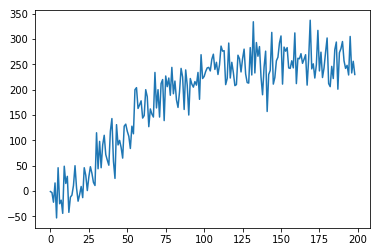

In [208]:
# code for genrating episode
memory = deque(maxlen=2000)
current_state =  (np.random.randint(0, m),np.random.randint(0, t),np.random.randint(0, d))
count  =  0
rewards = []
tot_reward = 0
for epi_len in range(episode_length):
    # pick a random action
    if epi_len % 50 == 0 and epi_len != 0:
        rewards.append(tot_reward)
        tot_reward = 0
    count = count + 1
    index_State = states.index([current_state[0],current_state[1],current_state[2]])
    X = state_trans(current_state,m,t,d)
    #randomly sample some r no of actions from the action set
    r = np.random.randint(1, 15)
    poss_actions = np.random.randint(0, (m-1)*m + 1, r)
    poss_actions_rep = [actions[i] for i in poss_actions]
    #print(act(prediction_DQN(m,t,d,poss_actions,X),epsilon,poss_actions_rep))
    #get the next action according to epsilon-greedy policy
    action = poss_actions_rep[np.int(act(prediction_DQN(m,t,d,poss_actions,X),epsilon,poss_actions_rep))]
    #obtain the reward by performing the action
    reward = reward_func(current_state, action, Time_matrix)
    tot_reward += reward
    #obtain the next state
    next_state = next_state_func(current_state, action, Time_matrix, t, d)
    #print("State: ",current_state, " Action: ", action, " Reward: ", reward, " Nextstate: ", next_state)
    #next_State = st[next_state[0],next_state[1],next_state[2]])
    #append curr_state, action, reward, next_state to memory replay buffer
    #print(X,actions.index(action),reward,index_Next_State)
    memory.append((X,actions.index(action),reward,next_state))
    current_state = next_state
    if count > batch_size:
        mini_batch = random.sample(memory, batch_size)
        target_mini_batch = np.zeros((batch_size, (m-1)*m + 1))
        input_mini_batch = np.zeros((batch_size, t+d+m))
        #update the model according to randomly sampled batch from replay memory
        for i in range(batch_size):
            X, action, reward, next_state = mini_batch[i]
            X_next = state_trans(next_state,m,t,d)
            target = prediction_DQN(m,t,d,list(range(len(actions))),X)
            #get the target for the Q-network
            target[action] = reward + gamma*np.amax(prediction_DQN(m,t,d,list(range(len(actions))),X_next))
            input_mini_batch[i, :] = X
            target_mini_batch[i, :] = target
        if epi_len%50 == 0:
            model.fit(input_mini_batch,target_mini_batch, epochs = 1, verbose = 1)
        else:
            model.fit(input_mini_batch,target_mini_batch, epochs = 1, verbose = 0)
        if epsilon > epsilon_min:
            epsilon *= epsilon_decay
    if epi_len % 50 == 0:
        print("Reward:{},Episode:{}, Epsilon:{}".format(reward,epi_len,epsilon))
plt.plot(list(range(len(rewards))), rewards)
plt.show()

In [161]:
x = np.zeros(25)
x = x.reshape(1,25)
x

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])